In [1]:
import supervenn, pandas, matplotlib_venn

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# define annotations for later

In [3]:
annotation_file = '/Users/adrian/research/keflavik/results/deseq2/annotation.tsv'
annotation = pandas.read_csv(annotation_file, sep='\t')
annotation

,Unnamed: 0,ensembl_transcript_id,ensembl_gene_id,external_gene_name,gene_biotype,description
0,1,ENST00000387314,ENSG00000210049,MT-TF,Mt_tRNA,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
1,2,ENST00000389680,ENSG00000211459,MT-RNR1,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:HGNC ...
2,3,ENST00000387342,ENSG00000210077,MT-TV,Mt_tRNA,mitochondrially encoded tRNA-Val (GUN) [Source...
3,4,ENST00000387347,ENSG00000210082,MT-RNR2,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:HGNC ...
4,5,ENST00000386347,ENSG00000209082,MT-TL1,Mt_tRNA,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...
...,...,...,...,...,...,...
278215,278216,ENST00000441160,ENSG00000228437,LINC02474,lncRNA,long intergenic non-protein coding RNA 2474 [S...
278216,278217,ENST00000412098,ENSG00000229463,LYST-AS1,lncRNA,LYST antisense RNA 1 [Source:HGNC Symbol;Acc:H...
278217,278218,ENST00000438371,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...
278218,278219,ENST00000715678,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...


# super venn

In [4]:
input_dir = '/Users/adrian/research/keflavik/results/deseq2/log2fc_pointsix/'

df = pandas.read_csv(input_dir+'effect_SETDB2_OE_M104.tsv', sep='\t', index_col=0)
a = set(df.index)
print(len(a))

df = pandas.read_csv(input_dir+'effect_miRNA1_M501.tsv', sep='\t', index_col=0)
b1 = set(df.index)
print(len(b1))

df = pandas.read_csv(input_dir+'effect_miRNA2_M501.tsv', sep='\t', index_col=0)
b2 = set(df.index)
print(len(b2))

df = pandas.read_csv(input_dir+'effect_miRNA1_Sk28.tsv', sep='\t', index_col=0)
c1 = set(df.index)
print(len(c1))

df = pandas.read_csv(input_dir+'effect_miRNA2_Sk28.tsv', sep='\t', index_col=0)
c2 = set(df.index)
print(len(c2))

861
206
94
69
100


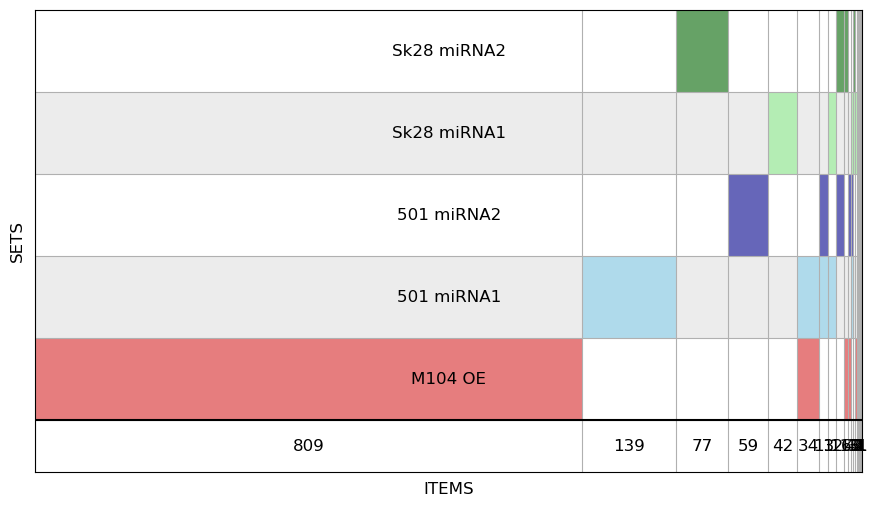

In [5]:
sets = [a, b1, b2, c1, c2]
labels = ['M104 OE', '501 miRNA1', '501 miRNA2', 'Sk28 miRNA1', 'Sk28 miRNA2']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', 
                          reverse_sets_order=False, fontsize=12, color_cycle=['tab:red', 'skyblue', 'darkblue', 'lightgreen', 'darkgreen'])

matplotlib.pyplot.show()

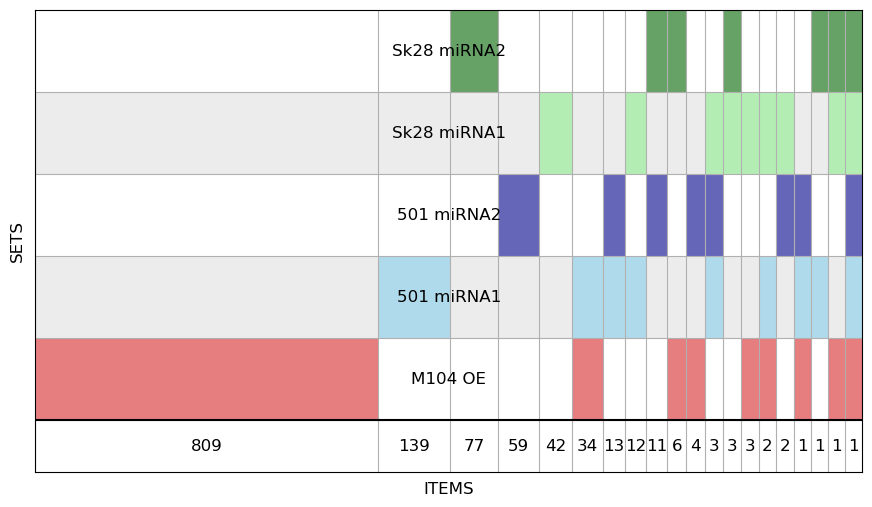

In [6]:
sets = [a, b1, b2, c1, c2]
labels = ['M104 OE', '501 miRNA1', '501 miRNA2', 'Sk28 miRNA1', 'Sk28 miRNA2']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', widths_minmax_ratio=0.05,
                          reverse_sets_order=False, fontsize=12, color_cycle=['tab:red', 'skyblue', 'darkblue', 'lightgreen', 'darkgreen'])

matplotlib.pyplot.show()

In [7]:
# explore what happened in 501 miRNA1 and M104 OE
a = mso.chunks[frozenset([0, 1])]
b = mso.chunks[frozenset([0, 1, 3])]
c = mso.chunks[frozenset([0, 1, 2])]
d = mso.chunks[frozenset([0, 1, 2, 3, 4])]
e = a.union(b, c, d)
print(len(e))

for ensembl in e:
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    print('{}\t{}\t{}'.format(ensembl, symbol, description))

38
ENSG00000166501	PRKCB	protein kinase C beta
ENSG00000243244	STON1	stonin 1
ENSG00000104332	SFRP1	secreted frizzled related protein 1
ENSG00000164434	FABP7	fatty acid binding protein 7
ENSG00000041982	TNC	tenascin C
ENSG00000101265	RASSF2	Ras association domain family member 2
ENSG00000175445	LPL	lipoprotein lipase
ENSG00000196935	SRGAP1	SLIT-ROBO Rho GTPase activating protein 1
ENSG00000105255	FSD1	fibronectin type III and SPRY domain containing 1
ENSG00000239508	PLCH1-AS1	PLCH1 antisense RNA 1
ENSG00000185985	SLITRK2	SLIT and NTRK like family member 2
ENSG00000085563	ABCB1	ATP binding cassette subfamily B member 1
ENSG00000181649	PHLDA2	pleckstrin homology like domain family A member 2
ENSG00000182463	TSHZ2	teashirt zinc finger homeobox 2
ENSG00000182752	PAPPA	pappalysin 1
ENSG00000213096	ZNF254	zinc finger protein 254
ENSG00000113369	ARRDC3	arrestin domain containing 3
ENSG00000135074	ADAM19	ADAM metallopeptidase domain 19
ENSG00000047644	WWC3	WWC family member 3
ENSG00000131409	L

# individual miRNAs Venn diagrams do venn diagrams individually

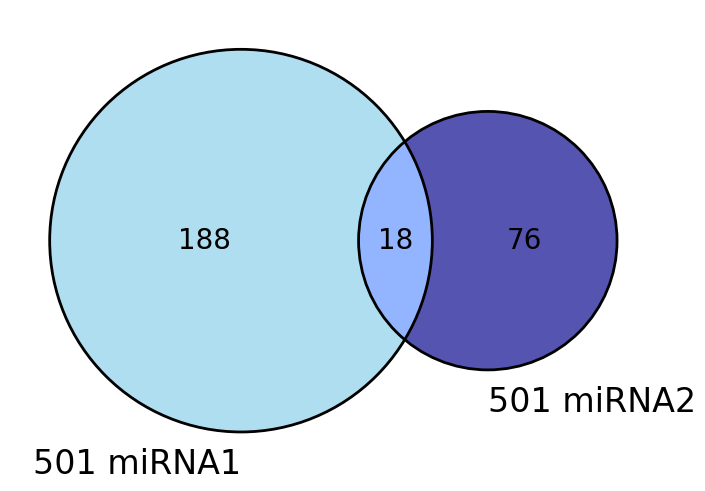

In [8]:
matplotlib_venn.venn2(subsets=(b1, b2),
                      set_labels=('501 miRNA1', '501 miRNA2'), 
                      set_colors=('skyblue', 'darkblue'),
                      alpha=2/3)
matplotlib_venn.venn2_circles(subsets=(b1, b2))  

matplotlib.pyplot.show()

In [9]:
# explore what happened in M501, both miRNAs
a = mso.chunks[frozenset([1, 2])]
b = mso.chunks[frozenset([1, 2, 3])]
c = mso.chunks[frozenset([0, 1, 2, 3, 4])]
d = mso.chunks[frozenset([0, 1, 2])]
print(len(a), len(b), len(c), len(d))
e = a.union(b, c, d)
print(len(e))

for ensembl in e:
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    print('{}\t{}\t{}'.format(ensembl, symbol, description))

13 3 1 1
18
ENSG00000106799	TGFBR1	transforming growth factor beta receptor 1
ENSG00000197457	STMN3	stathmin 3
ENSG00000135069	PSAT1	phosphoserine aminotransferase 1
ENSG00000156011	PSD3	pleckstrin and Sec7 domain containing 3
ENSG00000223572	CKMT1A	creatine kinase, mitochondrial 1A
ENSG00000196296	ATP2A1	ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 1
ENSG00000183150	GPR19	G protein-coupled receptor 19
ENSG00000136169	SETDB2	SET domain bifurcated histone lysine methyltransferase 2
ENSG00000136828	RALGPS1	Ral GEF with PH domain and SH3 binding motif 1
ENSG00000131711	MAP1B	microtubule associated protein 1B
ENSG00000188070	ZFTA	zinc finger translocation associated
ENSG00000113327	GABRG2	gamma-aminobutyric acid type A receptor subunit gamma2
ENSG00000114268	PFKFB4	6-phosphofructo-2-kinase/fructose-2,6-biphosphatase 4
ENSG00000115239	ASB3	ankyrin repeat and SOCS box containing 3
ENSG00000160716	CHRNB2	cholinergic receptor nicotinic beta 2 subunit
ENSG00000102003	SYP	synaptop

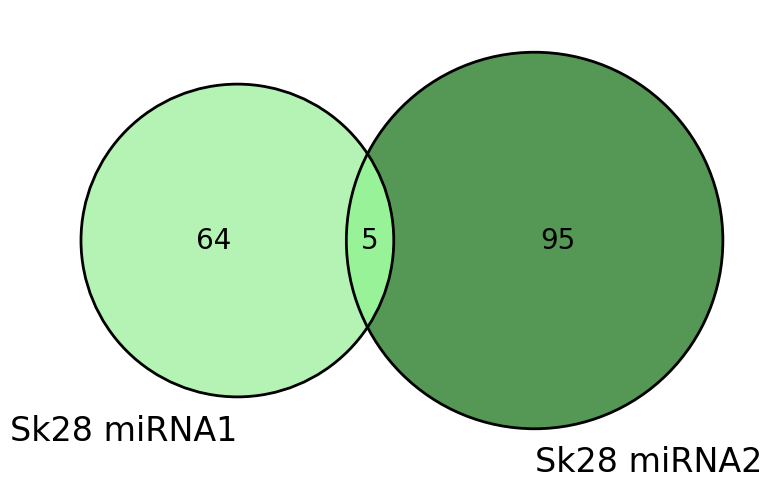

In [10]:
matplotlib_venn.venn2(subsets=(c1, c2),
                      set_labels=('Sk28 miRNA1', 'Sk28 miRNA2'), 
                      set_colors=('lightgreen', 'darkgreen'),
                      alpha=2/3)
matplotlib_venn.venn2_circles(subsets=(c1, c2))  

matplotlib.pyplot.show()